In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
img_array=cv2.imread("/content/Training_99951755.jpg")

In [ ]:
img_array.shape

(48, 48, 3)

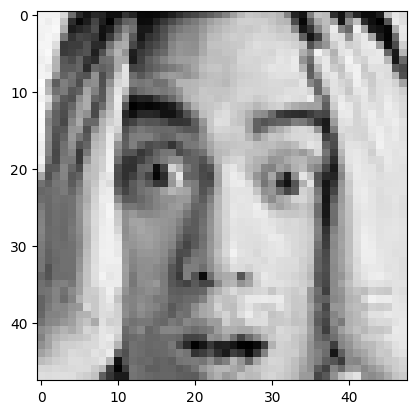

In [ ]:
plt.imshow(img_array)



In [ ]:
Datadirectory = '/content/drive/MyDrive/Training'

In [ ]:
Classes=["0","1","2","3","4","5","6"]

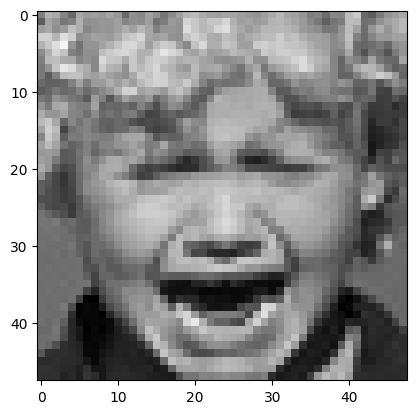

In [ ]:
for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

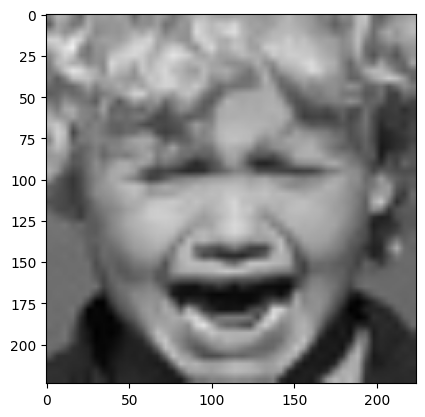

In [ ]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
new_array.shape

(224, 224, 3)

# READ ALL THE IMAGES AND CONVENTION THEM INTO ARRAY

In [ ]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])

            except Exception as e:
                pass
create_training_data()


In [ ]:
print(len(training_data))

910


In [ ]:
import random
random.shuffle(training_data)

In [ ]:
x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)

x=np.array(x).reshape(-1,img_size,img_size,3)

In [ ]:
x.shape

(910, 224, 224, 3)

In [ ]:
x=x/255.0

In [ ]:
type(y)

list

In [ ]:
Y=np.array(y)
Y.shape

(910,)

# Deep learning model for training-transfer learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model=tf.keras.applications.MobileNetV2()

In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

# transfer learning-tuning,training will starts from last check point

In [ ]:
base_input=model.layers[0].input

In [ ]:
base_output=model.layers[-2].output

In [ ]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)

final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)

final_output = layers.Dense(7, activation='softmax')(final_output)

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_5')>

In [ ]:
new_model = keras.Model(inputs=base_input, outputs=final_output)


In [ ]:
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [ ]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
new_model.fit(x, Y,epochs=15)


Epoch 1/15
29/29 [==============================] - 184s 6s/step - loss: 1.0583 - accuracy: 0.5176
Epoch 2/15
29/29 [==============================] - 157s 5s/step - loss: 0.6120 - accuracy: 0.7462
Epoch 3/15
29/29 [==============================] - 159s 5s/step - loss: 0.4415 - accuracy: 0.8264
Epoch 4/15
29/29 [==============================] - 157s 5s/step - loss: 0.4716 - accuracy: 0.8231
Epoch 5/15
29/29 [==============================] - 165s 6s/step - loss: 0.3033 - accuracy: 0.8901
Epoch 6/15
29/29 [==============================] - 158s 5s/step - loss: 0.3453 - accuracy: 0.8747
Epoch 7/15
29/29 [==============================] - 161s 6s/step - loss: 0.2497 - accuracy: 0.9231
Epoch 8/15
29/29 [==============================] - 160s 6s/step - loss: 0.1099 - accuracy: 0.9648
Epoch 9/15
29/29 [==============================] - 164s 6s/step - loss: 0.1495 - accuracy: 0.9495
Epoch 10/15
29/29 [==============================] - 160s 6s/step - loss: 0.1346 - accuracy: 0.9527
Epoch 11/

In [ ]:
new_model.save('Final_model_95p07.h5')

In [ ]:
new_model = tf.keras.models.load_model('Final_model_95p07.h5')


In [ ]:
frame=cv2.imread("/content/surpriseboy.jpg")

In [ ]:
frame.shape

(407, 612, 3)

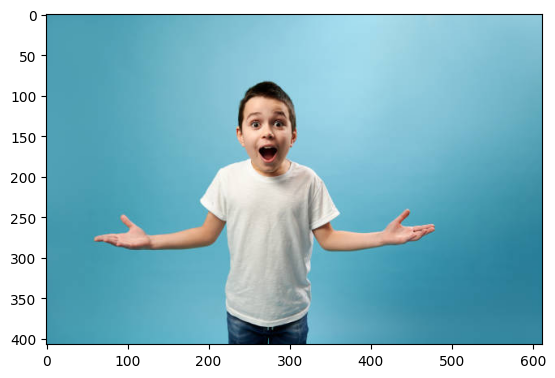

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
facecascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


In [ ]:
gray.shape

(407, 612)

In [ ]:
faces = facecascade.detectMultiScale(gray, 1.1,4)

for x, y, w, h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    facess = facecascade.detectMultiScale(roi_gray)

    if len(facess) == 0:
        print("Faces are not detected in the region of interest.")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex+ew]



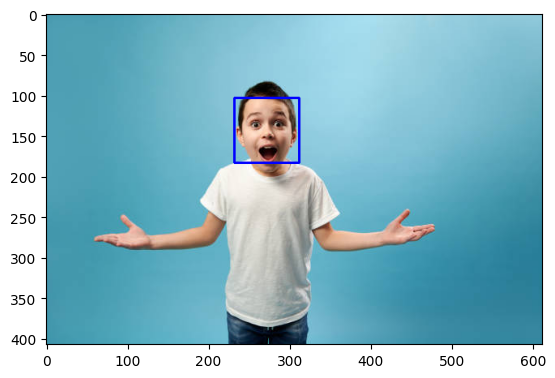

In [ ]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

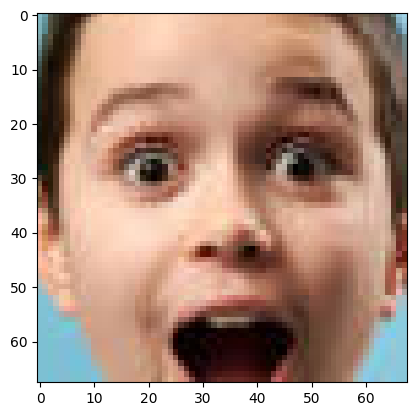

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [ ]:
final_image=cv2.resize(face_roi,(224,224))
final_image= np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [ ]:
predictions=new_model.predict(final_image)

1/1 [==============================] - 0s 53ms/step


In [ ]:
predictions[0]

array([4.2685905e-10, 3.6188303e-03, 9.9638122e-01, 5.0939507e-31,
       1.3622093e-29, 1.0289937e-24, 1.4675168e-27], dtype=float32)

In [ ]:
np.argmax(predictions)

NameError: name 'np' is not defined

# REAL TIME VIDEO DEMO

In [ ]:
import cv2


path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
rectangle_bgr = (255, 255, 255)
img = np.zeros((500, 500))

text = "some text in a box!"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x, text_offset_y), text_offset_x + text_width + 2, text_offset_y - text_height - 2)
cv2.rectangle(img, box_coords[0], (box_coords[0][0] + box_coords[1], box_coords[0][1] + box_coords[2]), rectangle_bgr, thickness=cv2.FILLED)


cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")

while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    for x, y, w, h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)

        if len(facess) == 0:
            print("face was not detected")
        else:
            for (ex, ey, ew, eh) in faces:
                face_roi = roi_color[ey: ey+eh, ex: ex+ew]

    final_image = cv2.resize(face_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image / 255.0

    font = cv2.FONT_HERSHEY_SIMPLEX
    predictions = new_model.predict(final_image)

    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    if np.argmax(predictions) == 0:
        status = "Angry"
    elif np.argmax(predictions) == 1:
        status = "Disgust"
    elif np.argmax(predictions) == 2:
        status = "Fear"
    elif np.argmax(predictions) == 3:
        status = "Happy"
    elif np.argmax(predictions) == 4:
        status = "Sad"
    elif np.argmax(predictions) == 5:
        status = "Surprise"
    else:
        status = "Neutral"

    x1, y1, w1, h1 = 0, 0, 175, 75
    cv2.rectangle(frame, (x1, x1), (x1+w1, y1+h1), (0, 0, 0), -1)
    cv2.putText(frame, status, (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    cv2.imshow('Face Emotion Recognition', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


OSError: cannot open webcam